In [2]:
import pandas as pd
from empath import Empath
import collections
import numpy as np
import os

raw_data = pd.read_csv('D:\School\ML\Sentiment-Wellness-Tool\data\data.csv')

bitmap_data = None

#region Data Transformation
def get_features(data):
    data_mod = data.dropna()

    lexicon = Empath()
    result = []
    labels = []

    for data in data_mod['statement']:
        result.append(lexicon.analyze(data))
    for label in data_mod['status']:
        labels.append(label)
    return result, labels


#endregion

In [3]:
features, labels = get_features(raw_data)

transformed_data = pd.DataFrame(features)

In [4]:
# new features
data = []

for item in features:
    temp = []

    for k in item:
        temp.append(item[k])

    data.append(temp)

data = np.array(data)

data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [5]:

classes = []
idx_to_labels = {}
labels_to_idx = {}
p_labels = []

for label in labels:
    i = 0
    
    if label not in classes:
        classes.append(label)
        idx_to_labels[i] = label
        labels_to_idx[label] = i

    p_labels.append(labels_to_idx[label])
    
    i += 1

p_labels = np.array(p_labels)
p_labels

array([0, 0, 0, ..., 0, 0, 0])

In [30]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
r_data = np.random.rand(1000, 194)
r_labels = np.random.randint(0, 7, size=(len(r_data),))  


def create_model():
    # Create a Sequential model
    model = keras.models.Sequential()

    # Add layers
    model.add(keras.layers.Dense(4096, input_shape=(194,), activation='relu'))
    model.add(keras.layers.Dense(2048, activation='relu'))
    model.add(keras.layers.Dense(1024, activation='relu'))
    model.add(keras.layers.Dense(512, activation='relu'))
    model.add(keras.layers.Dense(256, activation='relu'))
    model.add(keras.layers.Dense(128, activation='relu'))
    model.add(keras.layers.Dense(64, activation='relu'))
    model.add(keras.layers.Dense(32, activation='relu'))
    model.add(keras.layers.Dense(16, activation='relu'))
    model.add(keras.layers.Dense(8, activation='relu'))
    model.add(keras.layers.Dense(7, activation='sigmoid'))  # Output layer for multi-label classification

    # Compile the model
    model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
    
    return model

In [35]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=1)

for fold, (train_index, val_index) in enumerate(skf.split(data, p_labels)):
    print(f"Fold {fold + 1}/{3}")

    X_train, X_val = data[train_index], data[val_index]
    y_train, y_val = labels[train_index], labels[val_index]

    X_train = np.array(X_train)
    y_train = np.array(y_train)

    X_val = np.array(X_val)
    y_val = np.array(y_val)
    
    # Create a new instance of the model for each fold
    model = create_model()
    
    # Fit the model on the training data
    model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)
    
    # Evaluate the model on the validation data
    loss, accuracy = model.evaluate(X_val, y_val)
    print(f"Validation Accuracy: {accuracy:.4f}")

Fold 1/3


c:\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


549/549 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.1386 - loss: 1.9463
Validation Accuracy: 0.1436
Fold 2/3
549/549 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.1481 - loss: 1.9456
Validation Accuracy: 0.1453
Fold 3/3
549/549 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.1433 - loss: 1.9459
Validation Accuracy: 0.1419


In [6]:

# start clustering

# Start from importing necessary packages.
import warnings
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from IPython.display import display
from sklearn import metrics # for evaluations
from sklearn.datasets import make_blobs, make_circles # for generating experimental data
from sklearn.preprocessing import StandardScaler # for feature scaling
from sklearn.cluster import KMeans 

# make matplotlib plot inline (Only in Ipython).
warnings.filterwarnings('ignore')
%matplotlib inline

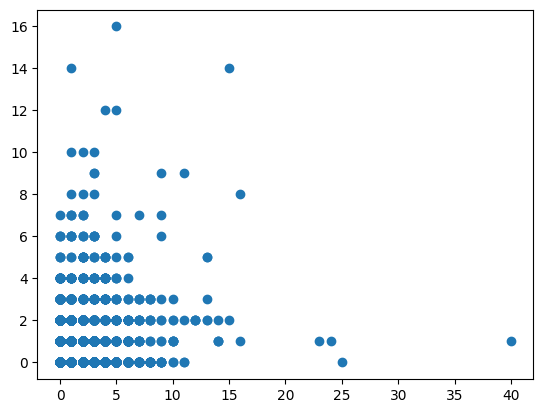

In [7]:
X = transformed_data.values

Y = transformed_data.columns.values

# Grafica la distribución de datos (_ground truth_) usando matplotlib `scatter(axis-x, axis-y, color)`.
plt.scatter(X[:,0], X[:,1])

In [8]:
""" K-means clustering algorithm.

Parameters
----------
n_init: int, optional, default: 10
        Number of time the k-means algorithm will be run with different
        centroid seeds. The final results will be the best output of
        n_init consecutive runs in terms of inertia.
        
init: {'k-means++', 'random', or ndarray, or a callable}, optional
        Method for initialization, default to 'k-means++'.
        
        'k-means++': selects initial cluster centers for k-mean
        clustering in a smart way to speed up convergence.
        
        'random': generate k centroids from a Gaussian with mean and
        variance estimated from the data.

tol: float, default: 1e-4
        Relative tolerance with regards to inertia to declare convergence
        tolerance is computed using `np.mean(np.var(X, axis=0)) * tol)`

"""
kmeans = KMeans(n_clusters=7,
                init='random',
                tol=1e-4, 
                random_state=170,
                verbose=True).fit(X)

Initialization complete
Iteration 0, inertia 7113778.0.
Iteration 1, inertia 4816717.311481239.
Iteration 2, inertia 4684973.523475787.
Iteration 3, inertia 4582071.497193836.
Iteration 4, inertia 4534690.30457157.
Iteration 5, inertia 4507405.122060445.
Iteration 6, inertia 4490913.411296143.
Iteration 7, inertia 4480153.472497137.
Iteration 8, inertia 4470204.43337467.
Iteration 9, inertia 4460181.429587541.
Iteration 10, inertia 4449430.720784295.
Iteration 11, inertia 4438391.139332097.
Iteration 12, inertia 4430879.51114255.
Iteration 13, inertia 4425547.49581838.
Iteration 14, inertia 4421825.852277929.
Iteration 15, inertia 4418931.879691296.
Iteration 16, inertia 4416616.148186523.
Iteration 17, inertia 4414476.323621439.
Iteration 18, inertia 4412531.788191849.
Iteration 19, inertia 4410444.638154744.
Iteration 20, inertia 4408453.244916582.
Iteration 21, inertia 4406593.383822231.
Iteration 22, inertia 4404833.725287248.
Iteration 23, inertia 4403368.562059233.
Iteration 24, 

In [47]:
# kmeans.labels_
# kmeans.cluster_centers_


array([1, 1, 1, ..., 1, 1, 2])

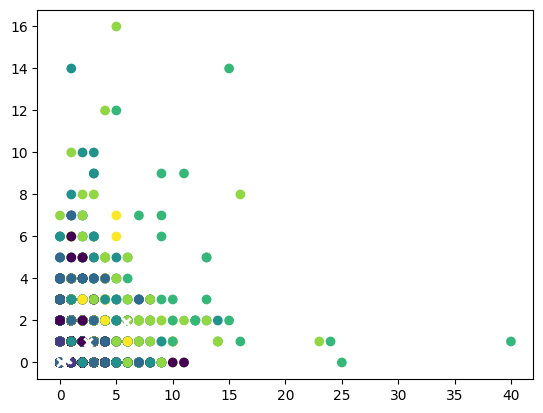

In [9]:
plt.scatter(X[:,0], X[:,1], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], 
            kmeans.cluster_centers_[:,1], 
            c='w', marker='x', linewidths=2)

In [ ]:
conv_data = []
conv_labels = []

data_clustered = {}

for index, label in enumerate(list(kmeans.labels_)):
    if label in list(data_clustered.keys()):
        data_clustered[label].append(data[index])
    else:
        data_clustered[label] = [data[index]]
    
for count, key in enumerate(list(data_clustered.keys())):
    n_data = []
    for index, item in enumerate(data_clustered[key]):
        
        if len(n_data) == 128:
            conv_data.append(np.array(n_data))
            conv_labels.append(key)
            n_data = []
            if len(conv_data) == (count + 1) * 1000:
                break

        n_data.append(item)
        
        for i, item2 in enumerate(data_clustered[key]):
        
            if not i == index:
                n_data.append(item2)
        
            if len(n_data) == 128:
                conv_data.append(np.array(n_data))
                conv_labels.append(key)
                if len(conv_data) == (count + 1) * 1000:
                    break
                n_data = []
        
conv_data